# DropOutについて

## 過学習（オーバーフィッティング）について

過学習は学習後のパラメータが入力データに依存しすぎてしまい、新たな入力データを入れても予測と実際のデータがかい離してしまう現象です。


多項式回帰で実際に見てみましょう。多項式とは

$$
\begin{aligned}
f(x) &= a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n\\
     &= \sum_{i=0}^n a_i x^i
\end{aligned}
$$

で表される式のことです。多項式回帰は各項のパラメータである$a_i$を調整することで予測する回帰モデルを作ることです。

多項式は$x^n$の$n$が最大のものを**次数**と呼びます.$n$の最大が3であれば3次多項式といいます。

機械学習ではこの$n$は「ハイパーパラメータ」といい、予測する人自身が決める必要があります。nが小さければ小さいほど直線に近い単純な線で表され、
大きければ大きい程複雑な線で表されます。大きければ大きいほどよさそうな気もしますが、必ずしもそうとはいえません。その理由が「過学習」です。


In [235]:
    # パッケージをインストール
using Pkg
Pkg.add("StatsBase")
Pkg.add("Statistics")
Pkg.add("MultivariateStats")
Pkg.add("DataFrames")
Pkg.add("GLM")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [250]:
using Plots
using Random

Random.seed!(1234)

# 母関数
F = x -> sin(x)

# 誤差を含んだデータ生成用の関数
f = x ->  sin(x) + randn()

# 描画用のデータ
X = 0:0.1:4*pi

# 取得（生成）したデータ
x = [xi for xi in 0.1:0.5:10]
y = [f(xi) for xi in x]

20-element Vector{Float64}:
 -0.25989549017665353
  1.6518509658236211
  0.4716177431225867
  1.7184835405074443
  1.2834565444426527
 -0.17016953045465488
  2.096343718497327
 -0.11762771384793674
 -1.1231783662608426
 -0.531996029354496
 -1.7707723987037112
  0.25544509121585446
 -0.1685887027204863
  0.4171929693971087
  0.18782564954541503
  0.27767956603040356
  0.03347466983166836
  0.11660070749979978
  0.47112860318433764
 -1.0737004911918107

本来であれば取得したデータを使いますが、今回はデータを作りました。

予測したい母集団は$y = \sin x$の波型です。
それに対して、生成したデータは$\sin x$に平均0、分散1の正規分布で生成した乱数を足しています。

プロットしてみると以下の通りです。

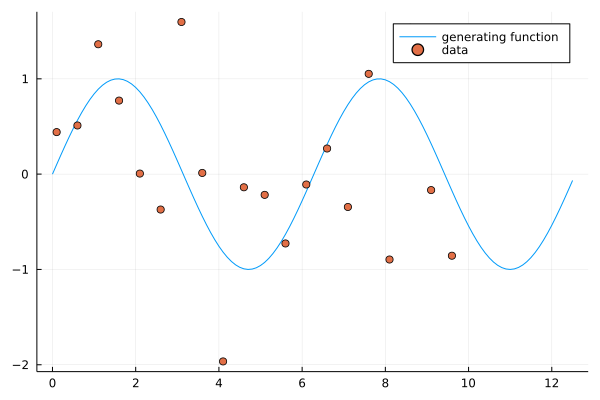

In [247]:
p = plot(X, F, label="generating function")
scatter!(p, x, y, label="data")

このデータについて、3、5、10、15、20次の多項式で考えます。


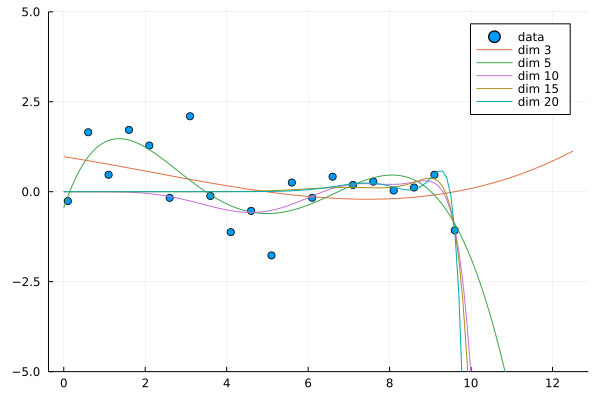

In [251]:
using DataFrames
using GLM


# 3次で考える
df = DataFrame(:x => x, :x2 => x.^2, :x3 => x.^3, :y => y)

lmans3 = lm(@formula(y ~ x + x2 + x3), df)
coef3 = coef(lmans3)

function predict3(x) 
    result = 0.0
    for (n, coef)=enumerate(coef3)
        result += coef * x^(n-1)
    end
    
    return result
end

# 5次で考える
df = DataFrame(:x => x, :x2 => x.^2, :x3 => x.^3, :x4 => x.^4, :x5 => x.^5, :y => y)

lmans5 = lm(@formula(y ~ x + x2 + x3 + x4 + x5), df)
coef5 = coef(lmans5)

function predict5(x) 
    result = 0.0
    for (n, coef)=enumerate(coef5)
        result += coef * x^(n-1)
    end
    
    return result
end


# 10次で考える
df = DataFrame(:x => x, :x2 => x.^2, :x3 => x.^3, :x4 => x.^4, :x5 => x.^5, :x6 => x.^6, :x7 => x.^7, :x8 => x.^8, :x9 => x.^9, :x10 => x.^10, :y => y)

lmans10 = lm(@formula(y ~ x + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10), df)
coef10 = coef(lmans10)

function predict10(x) 
    result = 0.0
    for (n, coef)=enumerate(coef10)
        result += coef * x^(n-1)
    end
    
    return result
end

# 15次で考える
df = DataFrame(:x => x, :x2 => x.^2, :x3 => x.^3, :x4 => x.^4, :x5 => x.^5, :x6 => x.^6, :x7 => x.^7, :x8 => x.^8, :x9 => x.^9, :x10 => x.^10, 
               :x11 => x.^11, :x12 => x.^12, :x13 => x.^13, :x14 => x.^14, :x15 => x.^15, :y => y)

lmans15 = lm(@formula(y ~ x + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 + x12 + x13 + x14 + x15), df)
coef15 = coef(lmans15)

function predict15(x) 
    result = 0.0
    for (n, coef)=enumerate(coef15)
        result += coef * x^(n-1)
    end
    
    return result
end

# 20次で考える
df = DataFrame(:x => x, :x2 => x.^2, :x3 => x.^3, :x4 => x.^4, :x5 => x.^5, :x6 => x.^6, :x7 => x.^7, :x8 => x.^8, :x9 => x.^9, :x10 => x.^10, 
               :x11 => x.^11, :x12 => x.^12, :x13 => x.^13, :x14 => x.^14, :x15 => x.^15,
               :x16 => x.^16, :x17 => x.^17, :x18 => x.^18, :x19 => x.^19, :x20 => x.^20, :y => y)
    
lmans20 = lm(@formula(y ~ x + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18 + x19 + x20), df)
coef20 = coef(lmans20)

function predict20(x) 
    result = 0.0
    for (n, coef)=enumerate(coef20)
        result += coef * x^(n-1)
    end
    
    return result
end



p = scatter(x, y, label="data", ylim=(-5,5))
plot!(X, predict3, label="dim 3")
plot!(X, predict5, label="dim 5")
plot!(X, predict10, label="dim 10")
plot!(X, predict15, label="dim 15")
plot!(X, predict20, label="dim 20")




次数が小さいほど各点からは離れています。次数が高いほど点に近づいています。

しかし、次数が高い方はグラフの右端で急激に変化しています。

母関数とも比較してみましょう。

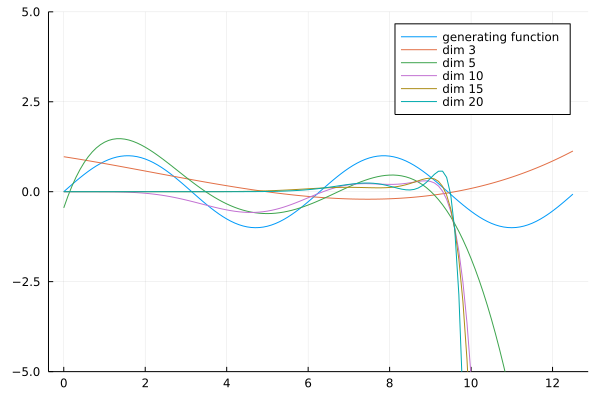

In [260]:
p = plot(X, F, label="generating function", ylim=(-5, 5))
plot!(X, predict3, label="dim 3")
plot!(X, predict5, label="dim 5")
plot!(X, predict10, label="dim 10")
plot!(X, predict15, label="dim 15")
plot!(X, predict20, label="dim 20")


母関数と比較すると、次数が小さい3や5が全体としては母関数に近いようにも見えます。

誤差関数（最小二乗誤差）で見てみましょう。

In [261]:
predicts = [predict3, predict5, predict10, predict15, predict20]

for predict in predicts
    error = 0.0
    for (i,xi)=enumerate(x)
        # 各xにおける予測値と観測データとの差を二乗して足す
        error += (predict(xi) - y[i] )^2
    end
    println(predict,": ", error)
end

predict3: 14.913248097481013
predict5: 8.874686915370207
predict10: 15.951090007444185
predict15: 17.13668205947593
predict20: 16.96958719953446


数値でみると誤差が最も少ないのは次数が5のときでした。次数が5から先は誤差がまた増えています。

なぜこのようなことが起こるのか、ということを厳密に話そうとすると **自由度** が必要なため、軽く？ご紹介します。


--- 
## 自由度

次数を高くするということは「複雑なグラフを描く」ということであることは先ほどお話しました。
「複雑に描く」というのは、「曲線の曲がる回数を増やす」ということです。

学習させるときには誤差関数を小さくすることで、極力、点に近くなるように計算しながらパラメータを定めます。
曲線の曲がる回数を増やすことで、「点に近くなるように」グラフを描けます。
しかしそれを過剰にしてしまうと、「ただ点に近いだけ」の曲線ができます。

既存の点が母集団の点と合致していれば、これは良い曲線といえるでしょう。
しかし、多くの場合にはデータには「誤差」があります。誤差のある点に近づけるということは「元の母集団の点からは離れる」ということを意味します。
それは曲がる回数が多ければ多い、つまり次数が高い多項式であればあるほどズレが生じえます。これが過学習です。


過学習を避ける一つの理由として「自由度を下げる」ということがあります。**自由度**とは「自由に動かせる数」のことです。
といってもわかりづらいので、簡単に説明します。

$$1 + 2 + ? = 6$$

という式があったときに、 ?に当てはまる数は（通常は）3しかありません。これは前の項の$1+2$に縛られているからです。
しかし、

$$1 + ?_1 + ?_2 = 6$$

であったときには$?_1$と$?_2$には何が入るでしょうか？$?_1,?_2$がともに整数のときは

$?_1$ | $?_2$
----- | -----
2 | 3
3 | 2
10 | -5
-20 | 25
$\dots$ | $\dots$


というように、「自由に」決められます（無数にあります）。自由度とは、「自由に決められる数の個数」です。ですので、

$$1 + ?_1 + ?_2 = 6$$

の自由度は2です。

少しだけ難しい話をします（あとでJuliaで確かめをしています）。　$x_1, x_2, x_3, \dots, x_n$  とするときの期待値（平均） $\mu$（ミュー）は、

$$\mu = \frac{1}{n} (x_1 + x_2 + \dots + x_n)  = \frac{1}{n} \sum_{i=1}^{n} x_i $$

で求められます。「すべてを足して個数で割る」やつです。　データは人が決められるものではないので、データの自由度は$n$です。

次に分散を考えます。分散$\sigma^2$ とは「データがどれだけ平均から離れているかの指標（統計量）」で、

$$
\begin{aligned}
\sigma^2 &= \frac{1}{n} (x_1 - \mu)^2 +  (x_2 - \mu)^2 + \dots + \dots (x_n - \mu)^2 \\ 
         &= \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2 
\end{aligned}
$$


と定義します。$(x_i - \mu)$ が「平均とデータがどれだけ離れているか」を表しています。二乗しているのは、二乗しないと**足し合わせたときに常に0**になってしまうからです。


In [32]:
using Random
using Printf

Random.seed!(10)

# データ
# 30個の乱数を取得
x = rand(1:100, 30)

# 平均
μ =　sum(x) / length(x)

@printf("平均は%.2f\n", μ)

# 分散？
σ_2_question = 0.0
for x_i in x
    σ_2_question += x_i - μ
end

@printf("二乗しないと %.2f になる", σ_2_question)


平均は40.53
二乗しないと 0.00 になる

図で表すと次の通りです。

<img src="images/DropOut/01.gif" style="width: 500px;">

平均はすべてのデータの真ん中に位置するので、その差をとったらプラス方向とマイナス方向の長さが出てきます。平均の作り方から、これらを足すと打ち消しあって0になってしまうというわけです。

ですが、「どれほど離れているか」を知りたいので、データと平均の「距離」を考えるために二乗しているわけです。最小二乗誤差と同じ発想です。

と、論旨がずれましたが、実は分散の自由度は平均とは異なり「n-1」です。平均の自由度はnでしたが、なぜ平均と違うのかというと分散の定義の中に平均がでてくるからです。

平均の式を式変形してみましょう。

$$
\begin{aligned}
\mu &= \frac{1}{n} (x_1 + x_2 + \dots + x_i + \dots + x_n)\\
n \mu &= (x_1 + x_2 + \dots + x_{i} + \dots + x_n) \quad \dots 両辺をn倍\\
x_i &= n \mu - ((x_1 + x_2 + \dots + x_{i-1} + x_{i+1} + \dots + x_n)) \quad \dots x_i= の式に変形
\end{aligned}
$$

上の式のように、平均と$x_i$以外のデータの値で$x_i$の値が決まるようになります。元々は自由なデータだった$x_i$ですが、平均という束縛があることで、
自由でなくなってしまったわけです。

ですので、改めて分散の式に　$x_i$の式を代入してみると　（複雑な式ですが、単純に$x_i$が式からなくなっただけです）

$$
\begin{aligned}
\sigma^2 &= \frac{1}{n} (x_1 - \mu)^2 +  (x_2 - \mu)^2 + \dots (x_i - \mu)^2  + \dots + \dots (x_n - \mu)^2 \\ 
         &= \frac{1}{n} (x_1 - \mu)^2 +  (x_2 - \mu)^2 + \dots + ( n \mu - ((x_1 + x_2 + \dots + x_{i-1} + x_{i+1} + \dots + x_n))  - \mu)^2  + \dots + \dots (x_n - \mu)^2 \\ 
\end{aligned}
$$

のように、$x_i$がなくても分散が求められるようになります。これが自由度が1小さくなった理由です。


先ほど定義した分散

$$
\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2 
$$


を **標本分散** といいます。ですが、この標本分散はさきほどの自由度の問題により、母分散（真のデータ群の分散）より小さくなります。ですので、一般的には **不偏分散** と呼ばれる

$$
\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu)^2 
$$

が使われます。

ごちゃごちゃしてきたので、Juliaで整理します。

In [35]:
using Random
using Printf

Random.seed!(10)

# データ
# 30個の乱数を取得
x = rand(1:100, 30)

# 平均
μ =　sum(x) / length(x)

@printf("平均は%.2f\n", μ)

# 標本分散
σ_2_sample = 0.0
for x_i in x
    σ_2_sample += (x_i - μ)^2
end

σ_2_sample /= length(x)

# 不遍分散
σ_2_unbiased = 0.0
for x_i in x
    σ_2_unbiased += (x_i - μ)^2
end

σ_2_unbiased /= (length(x)-1)


@printf("標本分散均は%.2f\n", σ_2_sample)
@printf("不偏分散は%.2f\n",σ_2_unbiased )
println("標本分散 < 不偏分散: ", σ_2_sample < σ_2_unbiased)
    



平均は40.53
標本分散均は825.52
不偏分散は853.98
標本分散 < 不偏分散: true


ものすごい脱線しました。

---


## 過学習を無くす一つの答え

話を戻すと、「自由度が高い」というのは「コンピュータ側が自由に決められるパラメータを増やす」ことです。つまりコンピュータ自身が好きなように数値を決められるわけですが、 
_**与えられたデータに対して合致するように**_ 指示しているため、 _**予測したい**_ という人側の願望が考慮されているとは限りません。

ですので、人側の願望をかなえられるように、コンピュータ側に制御する必要がでてきます。その制御の一つとして「自由度をあえて下げる」という方法です。
自由度を下げることは、コンピュータ側で勝手に決めても良いパラメータを減らすことです。もちろん、どの程度減らせばいいかは人側が考える必要があります。
しかし良い感じに減らすことで、コンピュータも力を抜いてパラメータを決められるようになります。

これが過学習を防ぐ方法です。がんばりすぎないようにするわけですね。

## 本題・DropOutについて

ディープラーニングにも過学習の問題があります。過学習は英語でオーバーフィッティング（Over Fitting）といいますが、「データに過剰に近づけすぎた」というのが正しい解釈です。

オーバーフィッティングがなぜ起こるのかは先ほどの紹介だと「次数が高すぎる」という問題がありましたが、これらの他にも

1. データが不足している状態での学習
2. 偏ったデータが多い状態での学習
3. 目的が明確でない状態での学習

など、理由はたくさんあります。

1. はデータが少ないことで一つのデータの重要度が高く、偏った結果を生んでしまうケースです。
2. はデータはたくさんあっても全体として偏っているため、求めたいモデルができないケースです。
3. はそもそも目的が漠然としていて、自分たちが想定しているモデルができないケースです（ _まれによく_ あります）。

いずれにしてもデータを増やすことで解消されますが、データが増えたからといって過学習が起きないというわけではありません。
最初にご紹介した通り、次数が高いことでも過学習はおきます。ですがこの過学習はハイパーパラメータ、つまり人が決めるものです。
そして、ディープラーニングのパラメータは非常に大きいです。データ数がn、ニューロン数がmとすれば$n \times m$がパラメータの数です。

データ数は固定のためニューロン数を決めるわけですが、最適なニューロン数がすぐに求められるというものでもありません。
また、階層の数も増えるごとにニューロン数を決める必要があります。

それらが決まったとしても、まだ過学習になる要素があります。それが「パラメータの依存度」です。
極端な例ですが、次のような学習モデルだったとしましょう。

<img src="images/DropOut/02.png" style="width: 700px">


このとき、明らかに3番目のニューロンが$x_2$に対して強い影響を与えるパラメータになっています。すると元データがいかなるデータであってもこのパラメータの影響が強すぎて、
同様の値になることが想定できます。

上の例では1つの値でしたが、$m \times n$個のパラメータのいくつかが多大に影響を及ぼすパラメータになることもありえます。


これを解消するのが「DropOut」です。DropOutは同じモデルを作るための学習を同じように行いますが、

1. すべてのニューロンをつかうわけではなく、確率的に使わないニューロンを選択して学習する
2. それらを平均化して、モデルを作成する

という方法で行います。

通常のディープラーニングではすべてのニューロンを使った上で学習しますが、使わないニューロンを選んでモデルを作成します。使わないニューロンを選択し直せば、また他のモデルができ上がります。
これを繰り返して複数のモデルを構築し、それらを平均化することで特定のパラメータに依存したモデルができづらくなります。

特に、2.については「アンサンブル学習」といわれる学習方法で、DropOut以前の学習スタイルでも活用されていました。

## DropOut の問題点

概要を紹介したところで、問題点を先に紹介します。

問題点は「現実的に（まともに）やろうとしたら現実的でないレベルの時間がかかる」ということです。

通常の学習であれば、例え1つのモデルができあがります。つまり、1回の学習で1つのモデルができ上がります。

しかし、「ニューロンを使う/使わない」をすべてのパターンを学習する必要があります。これはニューロン数に依存していて、ニューロン数がn個の場合ですべてのパターンをやろうとすると$2^n$回の学習が必要です。

<img src="images/DropOut/03.png" style="width: 700px">

ニューロンが16個だと65,536回のモデルを生成してそれらを平均して1つのモデルを作ることになります。しかし、これは非現実的でしょう。

ですので、これを解消するために **確率的に** 使わないニューロンを選択するという方法をとります。

また、厳密には後述しますが「ニューロンを使わない」ということで決定するパラメータが推論で使用する際には整合性がとれないものになります。
ですが、その整合性を合わせる方法も知られています。




## まっとうなDropOutの解説〜学習〜

「ニューロンを確率的に使うか使わないかを選ぶ」方法は「コインの裏表」を決めるのと同じように考えます。ただし現実のコインが裏表が出る確率が$\frac{1}{2}$とは限らないように、ニューロンを使わない確率も$\frac{1}{2}$とせずに「DropOut確率」として$p$とします。

$p$は確率なので$0 \leq p \leq 1$です。ニューロンを使う確率は「keep確率」$q$とも表されます。$q$は「$p$が起こらない確率」なので$q = 1 - p$です。


ここで、keep確率$q$を元にした**ベルヌーイ分布に従う**乱数を $r$ とします。


**ベルヌーイ分布** とは1が出る確率を$p$、0が出る確率を$1-p$とする確率モデルです。まさに「コインの裏表」を表現する確率モデルですね。（ベルヌーイ分布については別に解説します。）

要するに、rはqの確率で1をとり、1-q（つまりp）の確率で0をとる乱数です。「1のときはニューロンを採用する場合、0のときはニューロンを採用しない場合」というわけです。


あるi番目のニューロンにデータであるベクトル
$\displaystyle \begin{pmatrix} x_1\\x_2\\\vdots\\x_n \end{pmatrix}$ 
を入れると、パラメータが反映されて

$$w_1^{(i)} x_1 + w_1^{(i)} x_2 + \dots + w_n^{(i)} x_n$$

というような値が出力されます。これに対して$r$をかけます。keep確率$q$を満たしているときは$r=1$ですので、

$$r \times (w_1^{(i)} x_1 + w_1^{(i)} x_2 + \dots + w_n^{(i)} x_n) = w_1^{(i)} x_1 + w_1^{(i)} x_2 + \dots + w_n^{(i)} x_n $$


と、値を変えずにそのままニューロンのパラメータが反映されて出力されます。


一方でDropOut確率$p(=1-p)$ のときは$r=0$ですので、

$$r \times\begin{pmatrix} x_1\\x_2\\\vdots\\x_n \end{pmatrix} = 0$$

となり、そのニューロンの出力として0が出力されます。 つまり「実質的にそのニューロンを使わない」という状況を作れます。これを各ニューロンにデータを入れる際に実行していくわけです。

すると、次のような出力の形になります。

<img src="images/DropOut/04.png" style="width: 700px">

DropOutしたニューロンについてのみ0となり、keepしたニューロンについてはパラメータが適用された値が出力されます。

数式で表現すると次のように表現できます。


##### 1. 入力データ
$$
x = 
\begin{pmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{pmatrix}
$$

##### 2. 入力データに各ニューロンのパラメータを適用

$$
\begin{aligned}
W x &=
\begin{pmatrix}
w_{11} &  w_{12} & w_{13} & \dots & w_{1n} \\
w_{21} &  w_{22} & w_{23} & \dots & w_{2n} \\
w_{31} &  w_{32} & w_{33} & \dots & w_{3n} \\
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{pmatrix}\\
&=
\begin{pmatrix}
w_{11} x_1 + w_{12} x_2 + \dots w_{1n} x_n\\
w_{21} x_1 + w_{22} x_2 + \dots w_{2n} x_n\\
w_{31} x_1 + w_{32} x_2 + \dots w_{3n} x_n\\
\end{pmatrix}
\end{aligned}
$$

##### 3. keep確率$r_1,r_2,r_3$を適用

$r_1 = 1, r_2 = 0,r_3 = 1$とするとき

$$
\begin{aligned}
r W x
&=
\begin{pmatrix}
r_1 & 0 & 0\\
0  & r_2 & 0\\
0 & 0 & r_3\\
\end{pmatrix}
\begin{pmatrix}
w_{11} x_1 + w_{12} x_2 + \dots w_{1n} x_n\\
w_{21} x_1 + w_{22} x_2 + \dots w_{2n} x_n\\
w_{31} x_1 + w_{32} x_2 + \dots w_{3n} x_n\\
\end{pmatrix}\\\\
&=
\begin{pmatrix}
r_1(w_{11} x_1 + w_{12} x_2 + \dots w_{1n} x_n)\\
r_2(w_{21} x_1 + w_{22} x_2 + \dots w_{2n} x_n)\\
r_3(w_{31} x_1 + w_{32} x_2 + \dots w_{3n} x_n)\\
\end{pmatrix}\\\\
&=
\begin{pmatrix}
w_{11} x_1 + w_{12} x_2 + \dots w_{1n} x_n\\
0\\
w_{31} x_1 + w_{32} x_2 + \dots w_{3n} x_n\\
\end{pmatrix}\\
\end{aligned}
$$

行列の操作としては出力したデータにkeep確率を対角成分に並べた対角行列をかける操作で実装できます。

In [79]:
import Random

Random.seed!(165)

# 入力データ
x = [1; 10; 100]

#パラメータ
W = [1 2 3; 4 5 6; 7 8 9]

# 仮のkeep確率を求める関数
get_keep_prob = () -> rand() >= 0.3 ? 1 : 0

# keep確率
r_1 = get_keep_prob()
r_2 = get_keep_prob()
r_3 = get_keep_prob()

r = [r_1 0 0; 0 r_2 0; 0 0 r_3]

# パラメータを適用
y = W * x

# DropOut
y_DropOuted = r * y




println("DropOut前:", y)
println("DropOut後:", y_DropOuted)





DropOut前:[321, 654, 987]
DropOut後:[321, 0, 987]


## まっとうなDropOutの解説　〜推論〜

複数回実行して平均を取るなどの説明はしていませんが、おおよそDropOutの主要な部分は上の解説の通りです。

DropOutを使って作成したモデルを使うわけですが、「ニューロンを使わない」という発想が実際に使用する際に障害になります。

例えば上のJuliaの例のように、30%の確率でDropOutしたとします。これによってできたモデルを「DropOutモデル」と呼びます。

学習時と推論時の環境と合わせると、整合性が保たれるように感じます。ですので、学習時と同じように「推論時も30%の確率でDropOutする」ことを考えます。
すると何が起こるかというと、「どのニューロンがDropOutするかで予測が変わってしまう」という問題が起きます。
これでは学習したモデルに沿った推測ができるとは限りません。

ですので、「すべてのニューロンを使う」という選択肢しかありません。
すると今度は、30%のDropOut、逆に言えば70%のkeepしたニューロンの影響が色濃く出ます。
「欠員すれば一人当たりの負荷が増える」というやつですね。


具体例の方がわかりやすいので、例を挙げます（ただ厳密性とはほど遠いですばかりか、間違えた説明の可能性もあります）。
ヒントとしては「単位を合わせる」という考え方に近いかもしれません。


10個のニューロンがあります。
学習フェーズのDropOut確率30%で3個がDropOutしました。すると7個のニューロンがkeepします。
「スケール」を$\displaystyle \frac{1}{使用するニューロンの数}$とすると、この学習フェーズのスケールは$\displaystyle \frac{1}{7}$です。

テストフェーズには10個のニューロンを使います。するとテストフェーズのスケールは$\displaystyle \frac{1}{10}$です。

学習フェーズとテストフェーズのスケールが異なるため、ニューロンの「影響力」が変わってきます。


$$\frac{1}{7} = \frac{10}{7} \frac{1}{10}$$

のため（左辺は学習フェーズのスケール、右辺の右はテストフェーズのスケール）、各アウトプットは$\frac{10}{7}$倍された値が出力されます。
ですので、出力されたアウトプットに$\frac{10}{7}$の逆数である$\frac{7}{10}$をかければ、元のスケールの値が求められます。


これを一般的に言い変えます。

$q$をkeep確率として学習フェーズでモデルを作成します。これをテストフェーズに適用しようとすると $\frac{1}{q}$倍のアウトプットが出てしまうため、
最終的なアウトプットに$q$をかけることで整合性がとれます。


ただし、次に解説する方が一般的に使われています。
今紹介した方法は次のものと比較して「Direct DropOut」と言われています。


##　Inverted DropOut

先ほどは「テストフェーズ側で学習フェーズのスケールの差を調整しました。しかしこれを適用すると

1. テストフェーズの度に差の調整が必要
2. 学習フェーズでのみ必要だったDropOut確率（keep確率）を、テストフェーズの段階でも保持しないといけない

というデメリットがあります。この両方の問題を解消したのが「Inverted DropOut」です。


やり方は簡単で、先ほどとは逆に「学習フェーズ側でテストフェーズのスケールの差を調整」するのです。

一般化した説明をしてしまうと、学習フェーズの最終的な結果に$\displaystyle \frac{1}{q}$をかけることで、スケールを合わせるのです。

先ほどはテストフェーズの結果に$q$をかけていたので、本当に逆の操作をしているだけですね。
これだけで大幅に速度の向上が見込めます。


